# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [2]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [8]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [10]:
print(f'Largest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].min()} ')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2 


In [11]:
df_tesla.describe()
# the describe gets all the data and does it for you with the count and mean. 

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [14]:
df_tesla['TSLA_WEB_SEARCH'].idxmax() # which is 123
df_tesla['TSLA_USD_CLOSE'][123]

407.339996

In [18]:
df_tesla[df_tesla.index == 123]

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
123,2020-09-01,31,407.339996


In [20]:
# the peridocity of the tesla search. is it weekly or monthly
df_tesla.value_counts('MONTH')

MONTH
2010-06-01    1
2016-12-01    1
2018-01-01    1
2017-12-01    1
2017-11-01    1
             ..
2013-06-01    1
2013-05-01    1
2013-04-01    1
2013-03-01    1
2020-09-01    1
Length: 124, dtype: int64

### Unemployment Data

In [23]:
df_unemployment.head()
df_unemployment.shape
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


In [25]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment["UE_BENEFITS_WEB_SEARCH"].max()} ')

Largest value for "Unemployemnt Benefits" in Web Search: 100 


### Bitcoin

In [26]:
df_btc_search.shape

(73, 2)

In [27]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [29]:
df_btc_search.describe()


,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [30]:
print(f'largest BTC News Search: {df_btc_search["BTC_NEWS_SEARCH"].max()} ')

largest BTC News Search: 100 


In [31]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [32]:
print(f'Missing values for Tesla?: ')
print(f'Missing values for U/E?: ')
print(f'Missing values for BTC Search?: ')

Missing values for Tesla?: 
Missing values for U/E?: 
Missing values for BTC Search?: 


In [74]:
# finding the nan values in the dataframe.
df_tesla.isnull().values.any() # tesla is false
df_btc_price.isnull().values.any() # btc price is true
df_btc_search.isnull().values.any() # btc search is false
df_unemployment.isnull().values.any() # unemployment is false

df_tesla.isnull().sum().sum() # which is 0
df_btc_price.isnull().sum().sum() # which is 2
df_btc_search.isnull().sum().sum() # which is 0 
df_unemployment.isnull().sum().sum() # which is 0

# now i know that the nan values are in the btc price dataframe
df_btc_price.isnull().sum() # this shows that the nan values are in the CLOSE AND VOLUME columns
df_btc_price['CLOSE'].isnull().sum() # now its 0 but before it was 1

0

In [51]:
nan_list = [index for index, row in df_btc_price.iterrows() if row.isnull().any() ]
nan_list
# to find the index where there is nan value

[2148]

In [52]:
df_btc_price[df_btc_price.index == 2148]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


In [57]:
df_btc_price.loc[2148]

DATE      2020-08-04
CLOSE            NaN
VOLUME           NaN
Name: 2148, dtype: object

In [8]:
print(f'Missing values for BTC price?: ')

Missing values for BTC price?: 


In [5]:
print(f'Number of missing values: ')

Number of missing values: 


**Challenge**: Remove any missing values that you found. 

In [72]:
# removing the missing rows from the btc_price dataframe
# new = df_btc_price.drop(labels=(2148), inplace=True)
df_btc_price.isnull().sum()
# after cleaning the dataframe, you can decide to create a new one altogether using the inplace keyword argument.
# if true it will replace the current frame and return a fresh one but withe the same name but if false. it will only
# change it temporarily

DATE      0
CLOSE     0
VOLUME    0
dtype: int64

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [78]:
type(df_btc_price['DATE'][2])

str

In [80]:
# changing to datetime because if the datetime is in a stringm you can't visualize it.
new_date_series = pd.to_datetime(df_btc_price['DATE'])
new_date_series

0      2014-09-17
1      2014-09-18
2      2014-09-19
3      2014-09-20
4      2014-09-21
          ...    
2199   2020-09-24
2200   2020-09-25
2201   2020-09-26
2202   2020-09-27
2203   2020-09-28
Name: DATE, Length: 2203, dtype: datetime64[ns]

In [87]:
# adding the new_date_series to the dataframe
# df_btc_price.insert(1, 'NEW DATE', new_date_series)
# after you hash it out because you will get an error
df_btc_price.head()
type(df_btc_price['NEW DATE'][2])

pandas._libs.tslibs.timestamps.Timestamp

In [95]:
# all the remaining 3 are strings instead of datetime
new_tsla_date = pd.to_datetime(df_tesla['MONTH'])
new_btc_search_date = pd.to_datetime(df_btc_search['MONTH'])
new_unemployment_search = pd.to_datetime(df_unemployment['MONTH'])

# add the new columns to the dataframes
df_btc_search.insert(1, "NEW_MONTH", new_btc_search_date)
df_tesla.insert(1, "NEW MONTH", new_tsla_date)
df_unemployment.insert(1, "NEW MONTH", new_unemployment_search)



In [96]:
type(df_tesla['NEW MONTH'][2])

pandas._libs.tslibs.timestamps.Timestamp

In [100]:
df_btc_price.drop(labels=('DATE'), inplace=True, axis=1)
# you use axis 1 when trying to drop a column, the default is 0
# also you can add multiple columns or index with the labels by putting a list of values to be dropped, the tuple 
# works for when the value to be dropped is single.

In [101]:
df_btc_price.head()

,NEW DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [106]:
df_tesla.head()
df_tesla['MONTH'] = pd.to_datetime(df_tesla['MONTH'])
# this is an easier way of doing it. you just replace the whole series at the same time. instead of having to name
# new ones and then inserting them into the dataframe.
df_tesla.head()

type(df_tesla['MONTH'][2])

pandas._libs.tslibs.timestamps.Timestamp

In [107]:
df_tesla["MONTH"]

0     2010-06-01
1     2010-07-01
2     2010-08-01
3     2010-09-01
4     2010-10-01
         ...    
119   2020-05-01
120   2020-06-01
121   2020-07-01
122   2020-08-01
123   2020-09-01
Name: MONTH, Length: 124, dtype: datetime64[ns]

In [109]:
df_btc_price.head()
df_btc_search.head()

,MONTH,NEW_MONTH,BTC_NEWS_SEARCH
0,2014-09,2014-09-01,5
1,2014-10,2014-10-01,4
2,2014-11,2014-11-01,4
3,2014-12,2014-12-01,4
4,2015-01,2015-01-01,5


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [114]:
df_btc_price_monthly = df_btc_price.resample('M', on='NEW DATE').last()
# the 'M' is the dateoffset object and the 'on' is For a DataFrame, column to use instead of index for resampling. Column must be datetime-like.
df_btc_price_monthly.head()

,NEW DATE,CLOSE,VOLUME
NEW DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


In [115]:
df_btc_price_monthly.shape

(73, 3)

In [116]:
df_btc_search.shape

(73, 3)

# Data Visualisation

In [122]:
df_tesla.head()
df_tesla.rename(columns={'NEW MONTH': 'FORMATTED MONTH'}, inplace=True)

In [123]:
df_tesla.head()

,MONTH,FORMATTED MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,2010-06-01,3,4.766
1,2010-07-01,2010-07-01,3,3.988
2,2010-08-01,2010-08-01,2,3.896
3,2010-09-01,2010-09-01,2,4.082
4,2010-10-01,2010-10-01,2,4.368


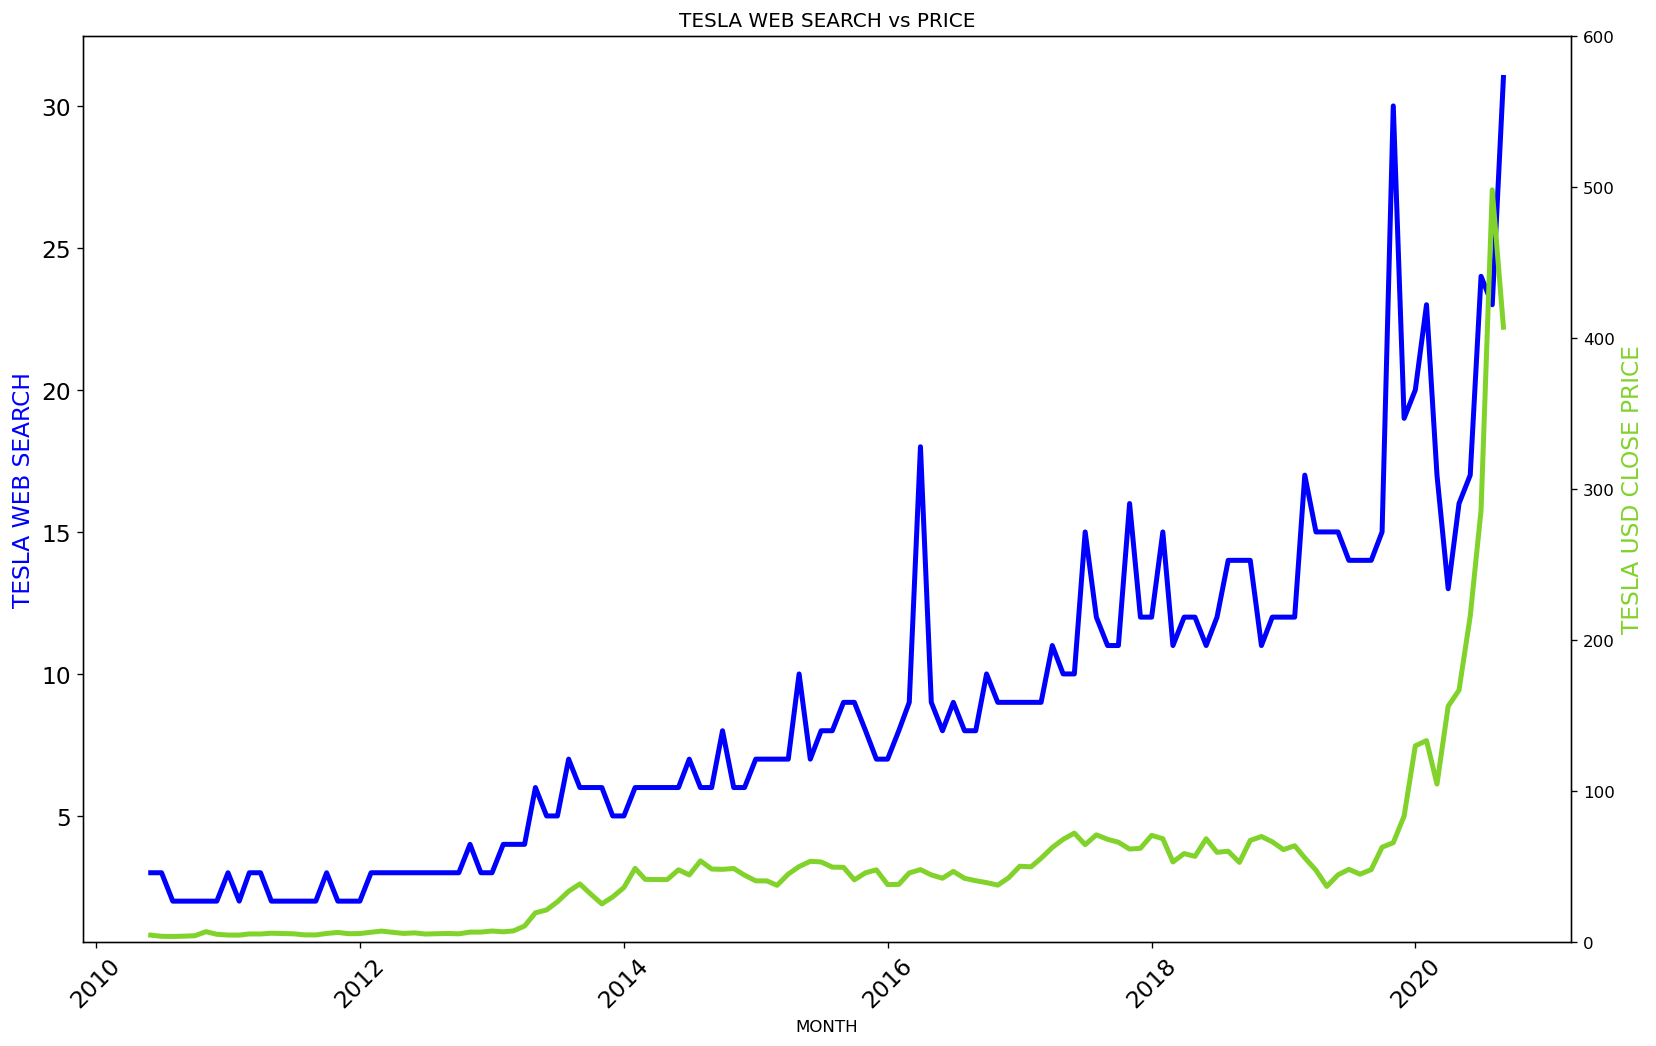

In [138]:
# creating a graph
plt.figure(figsize=(16,10), dpi=120) # increases the size and resolution. the dpi is the dots per inch
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.xlabel('MONTH')

plt.title('TESLA WEB SEARCH vs PRICE')

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('TESLA WEB SEARCH', fontsize=14, color="b")
ax2.set_ylim(0, 600)
ax2.set_ylabel('TESLA USD CLOSE PRICE', fontsize=14, color="#81D22A")

ax1.plot(df_tesla['FORMATTED MONTH'], df_tesla.TSLA_WEB_SEARCH, "b", linewidth=3)
ax2.plot(df_tesla['FORMATTED MONTH'], df_tesla.TSLA_USD_CLOSE, "#81D22A", linewidth=3)
# the line width increases the thickness of the graph lines


plt.show()

### Notebook Formatting & Style Helpers

In [142]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

In [143]:
# Register date converters to avoid warning messages
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

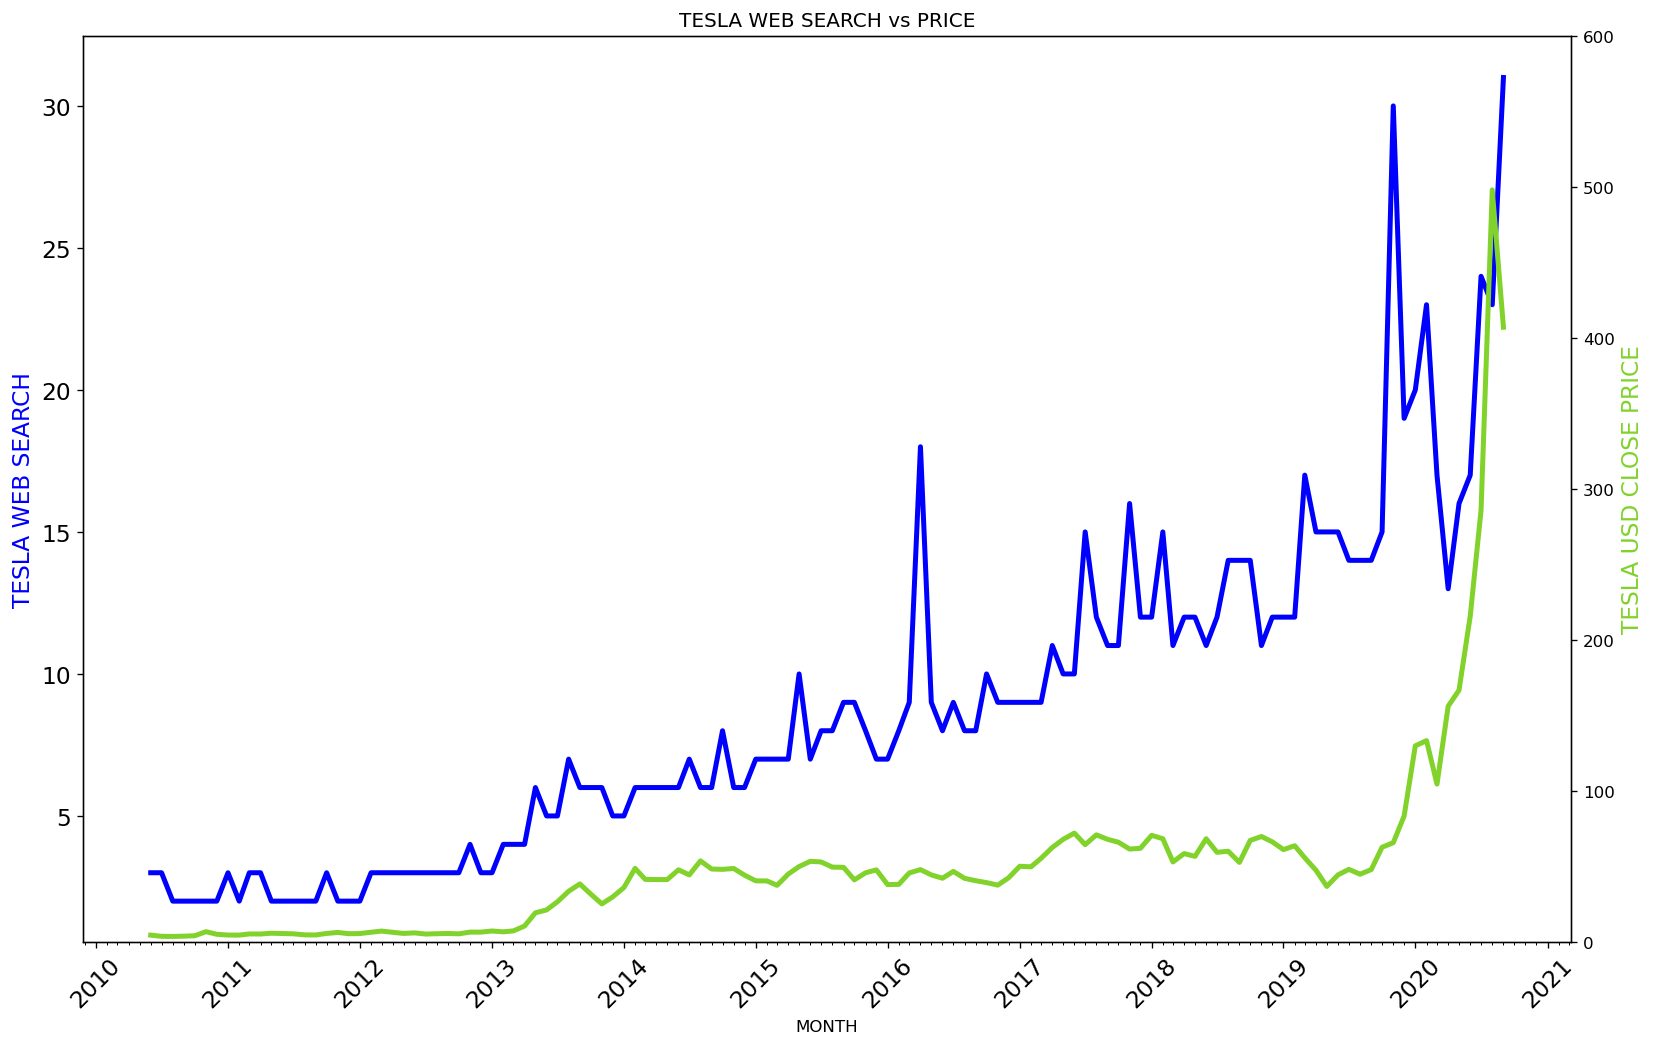

In [145]:
# creating a graph
plt.figure(figsize=(16,10), dpi=120) # increases the size and resolution. the dpi is the dots per inch
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.xlabel('MONTH')

plt.title('TESLA WEB SEARCH vs PRICE')

ax1 = plt.gca()
ax2 = ax1.twinx()

# add the formatting to the x axis so as to have the tick marks.
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('TESLA WEB SEARCH', fontsize=14, color="b")
ax2.set_ylim(0, 600)
ax2.set_ylabel('TESLA USD CLOSE PRICE', fontsize=14, color="#81D22A")

ax1.plot(df_tesla['FORMATTED MONTH'], df_tesla.TSLA_WEB_SEARCH, "b", linewidth=3)
ax2.plot(df_tesla['FORMATTED MONTH'], df_tesla.TSLA_USD_CLOSE, "#81D22A", linewidth=3)
# the line width increases the thickness of the graph lines


plt.show()

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

How to add tick formatting for dates on the x-axis. 

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

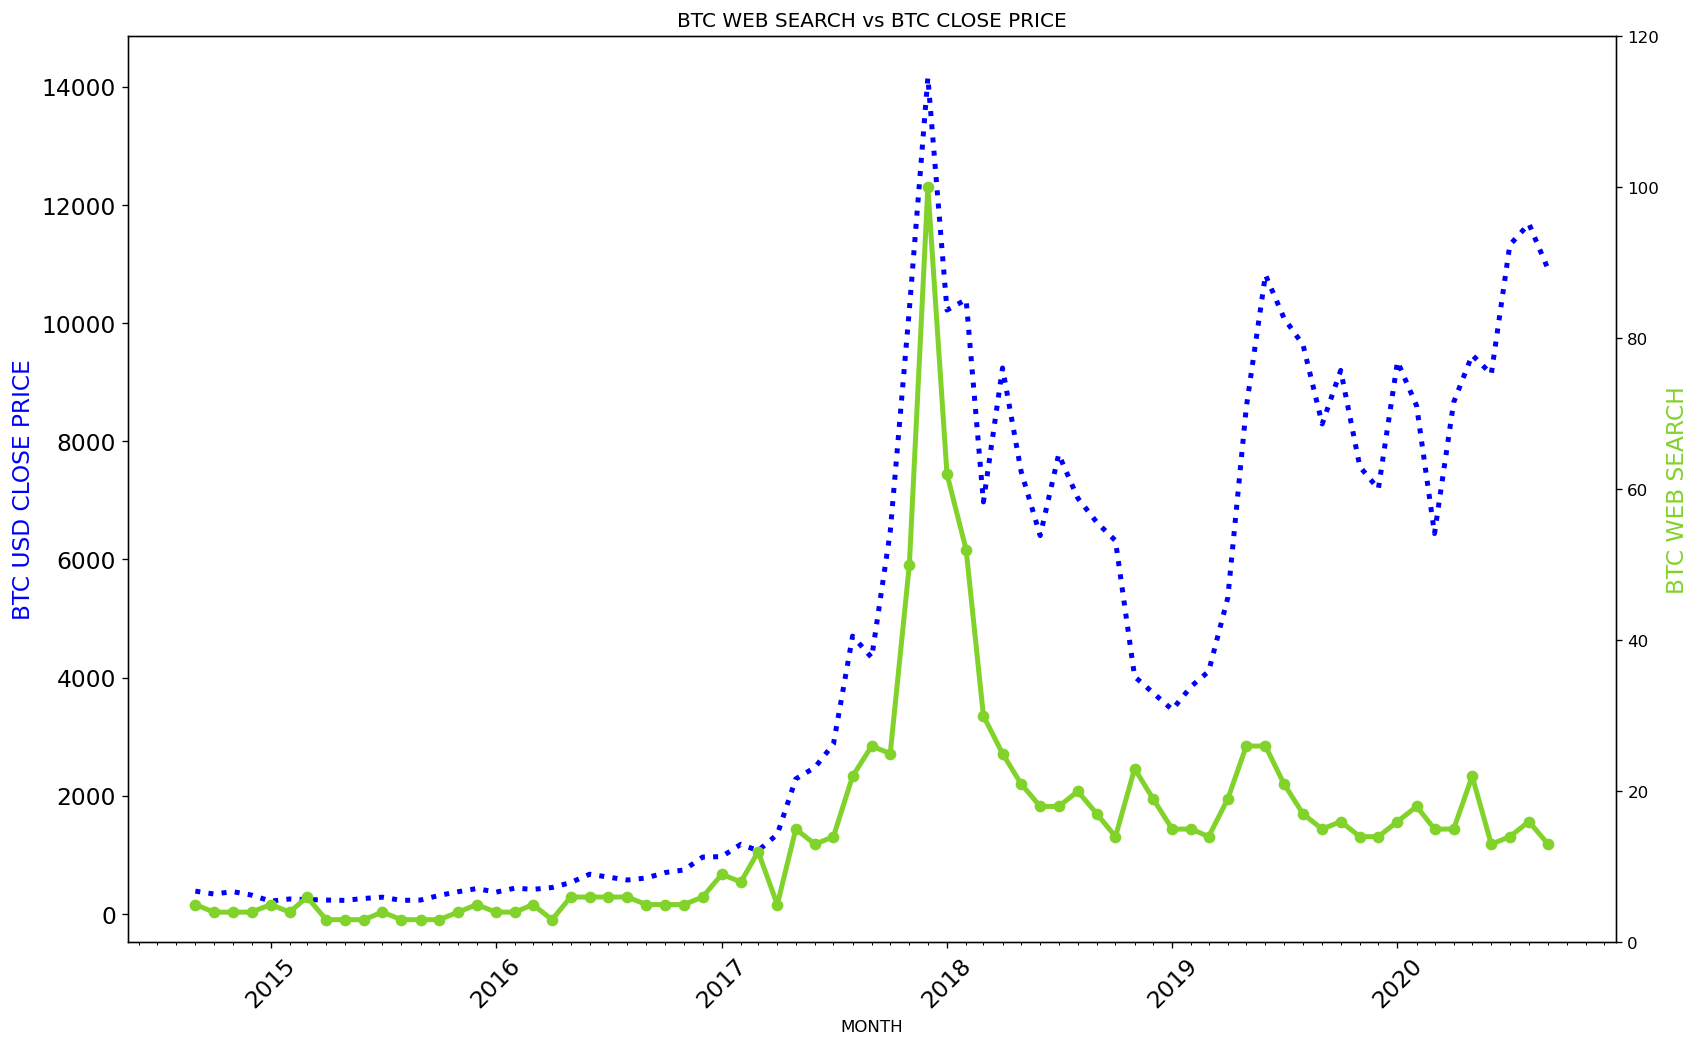

In [153]:
# creating a graph
plt.figure(figsize=(16,10), dpi=120) # increases the size and resolution. the dpi is the dots per inch
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.xlabel('MONTH')

plt.title('BTC WEB SEARCH vs BTC CLOSE PRICE')

ax1 = plt.gca()
ax2 = ax1.twinx()

# add the formatting to the x axis so as to have the tick marks.
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('BTC USD CLOSE PRICE', fontsize=14, color="b")
ax2.set_ylim(0, 120)
ax2.set_ylabel('BTC WEB SEARCH', fontsize=14, color="#81D22A")

ax1.plot(df_btc_search['NEW_MONTH'], df_btc_price_monthly['CLOSE'], "b", linewidth=3, linestyle='dotted')
ax2.plot(df_btc_search['NEW_MONTH'], df_btc_search['BTC_NEWS_SEARCH'], "#81D22A", linewidth=3, marker='o')
# the line width increases the thickness of the graph lines


plt.show()

In [147]:
df_btc_search.head()

,MONTH,NEW_MONTH,BTC_NEWS_SEARCH
0,2014-09,2014-09-01,5
1,2014-10,2014-10-01,4
2,2014-11,2014-11-01,4
3,2014-12,2014-12-01,4
4,2015-01,2015-01-01,5


In [148]:
df_btc_price_monthly.head()

,NEW DATE,CLOSE,VOLUME
NEW DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

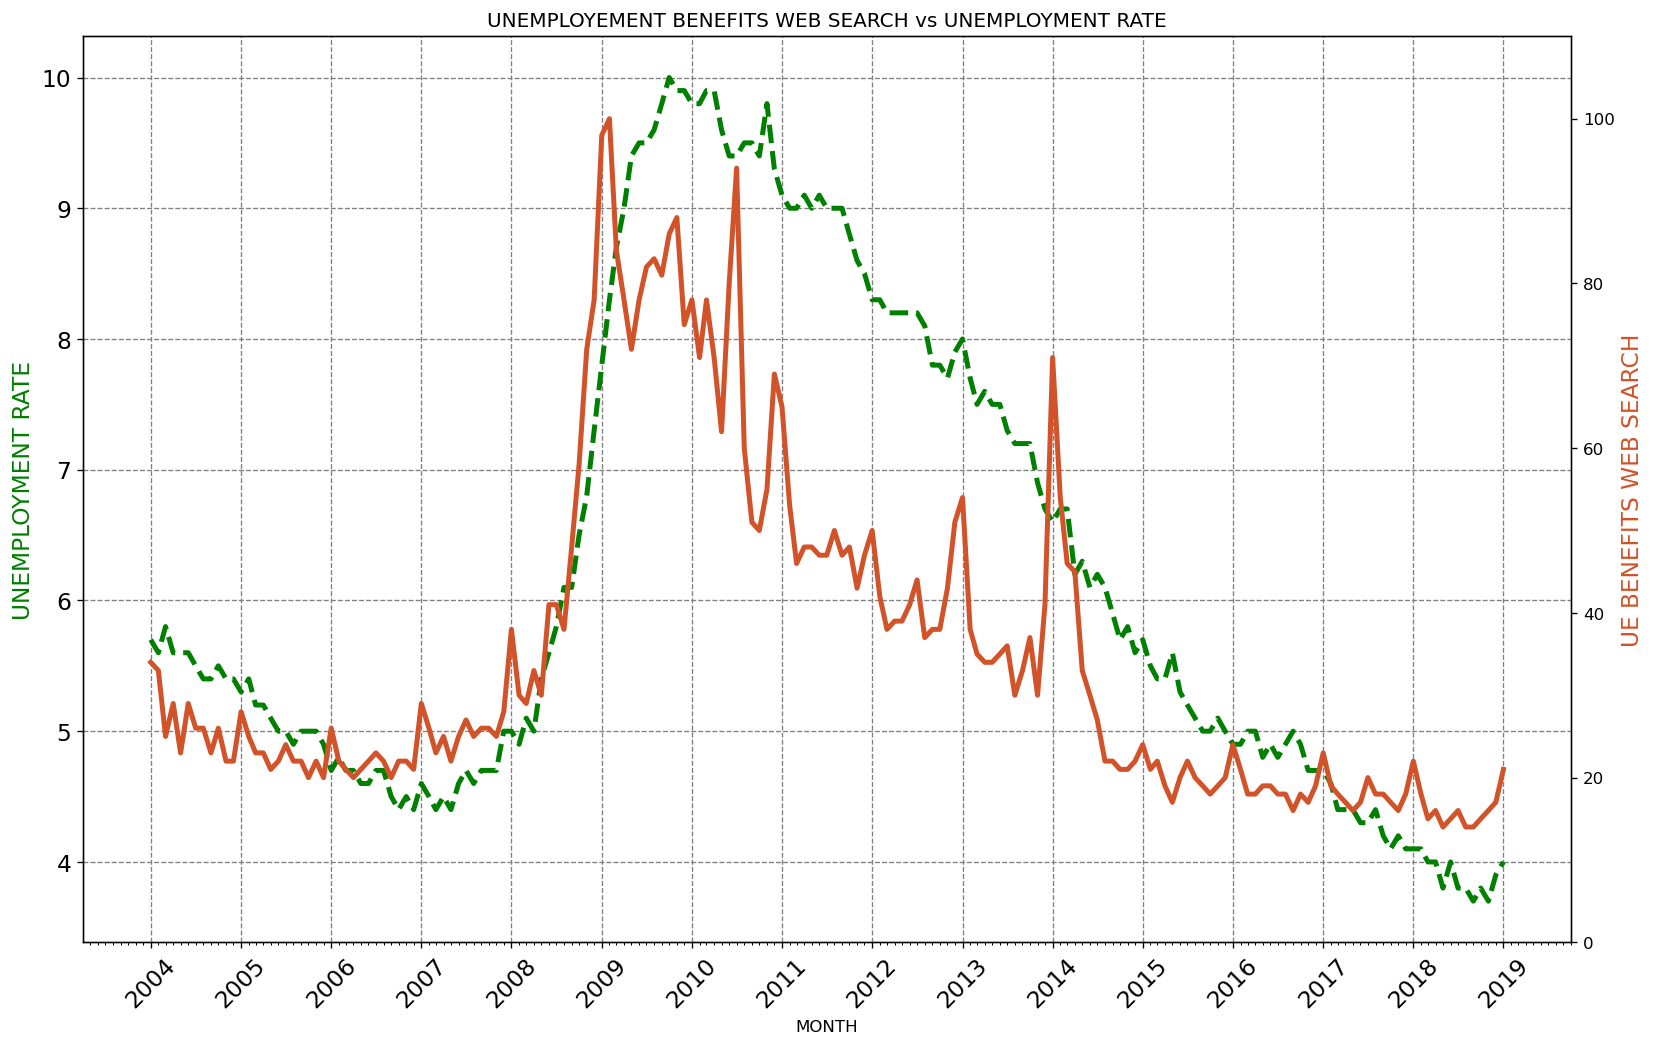

In [163]:
# creating a graph
plt.figure(figsize=(16,10), dpi=120) # increases the size and resolution. the dpi is the dots per inch
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.xlabel('MONTH')

plt.title('UNEMPLOYEMENT BENEFITS WEB SEARCH vs UNEMPLOYMENT RATE')

ax1 = plt.gca()
ax2 = ax1.twinx()

# add the formatting to the x axis so as to have the tick marks.
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('UNEMPLOYMENT RATE', fontsize=14, color="g")
ax2.set_ylim(0, 110)
ax2.set_ylabel('UE BENEFITS WEB SEARCH', fontsize=14, color="#D2532A")

ax1.plot(df_unemployment['NEW MONTH'], df_unemployment['UNRATE'], "g", linewidth=3, linestyle='dashed')
ax2.plot(df_unemployment['NEW MONTH'], df_unemployment['UE_BENEFITS_WEB_SEARCH'], "#D2532A", linewidth=3)
# the line width increases the thickness of the graph lines

ax1.grid(color='grey', linestyle='--')

plt.show()

In [171]:
df_unemployment.head()


,MONTH,NEW MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,2004-01-01,34,5.7
1,2004-02,2004-02-01,33,5.6
2,2004-03,2004-03-01,25,5.8
3,2004-04,2004-04-01,29,5.6
4,2004-05,2004-05-01,23,5.6


**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


In [170]:
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()
# need to provide columns or a series for the rolling to occur. still figuring that out.


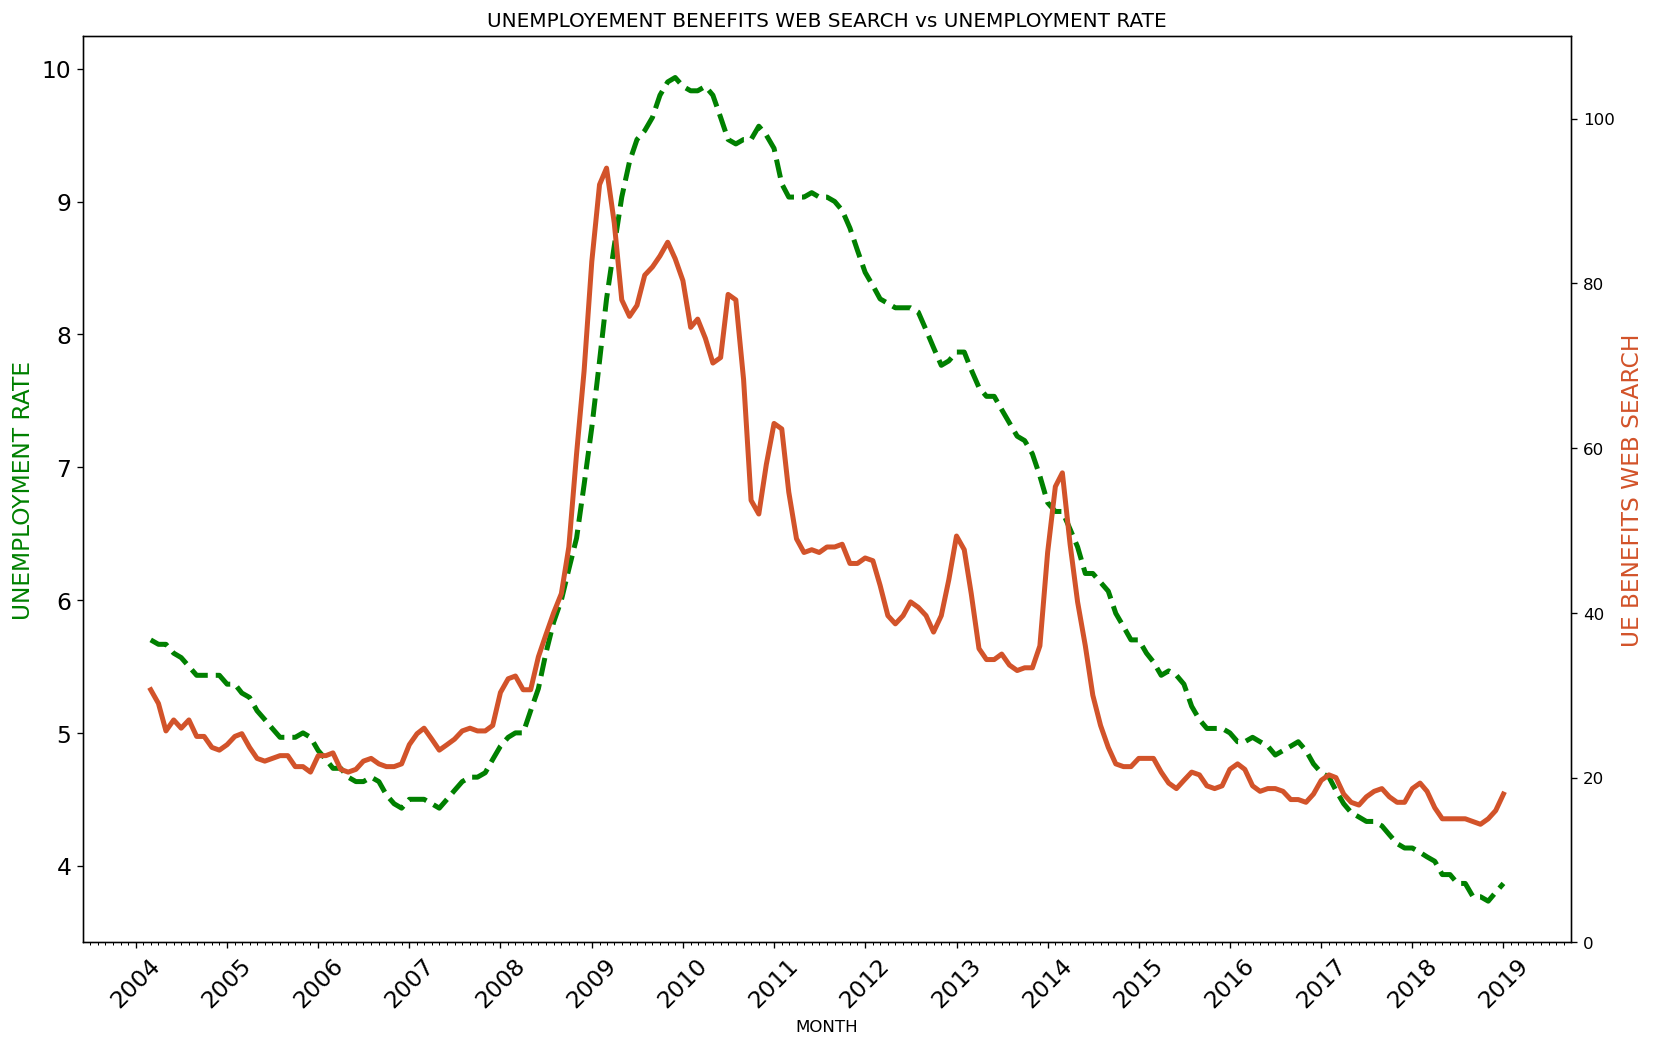

In [173]:
# creating a graph
plt.figure(figsize=(16,10), dpi=120) # increases the size and resolution. the dpi is the dots per inch
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.xlabel('MONTH')

plt.title('UNEMPLOYEMENT BENEFITS WEB SEARCH vs UNEMPLOYMENT RATE')

ax1 = plt.gca()
ax2 = ax1.twinx()

# add the formatting to the x axis so as to have the tick marks.
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('UNEMPLOYMENT RATE', fontsize=14, color="g")
ax2.set_ylim(0, 110)
ax2.set_ylabel('UE BENEFITS WEB SEARCH', fontsize=14, color="#D2532A")

roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=3).mean()

ax1.plot(df_unemployment['NEW MONTH'], roll_df['UNRATE'], "g", linewidth=3, linestyle='dashed')
ax2.plot(df_unemployment['NEW MONTH'], roll_df['UE_BENEFITS_WEB_SEARCH'], "#D2532A", linewidth=3)
# the line width increases the thickness of the graph lines



plt.show()

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [175]:
df_2020 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')
df_2020.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6


In [176]:
df_2020.MONTH = pd.to_datetime(df_2020['MONTH'])
df_2020.head()
# after changing the month to date time instead of a string format


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,9,5.7
1,2004-02-01,8,5.6
2,2004-03-01,7,5.8
3,2004-04-01,8,5.6
4,2004-05-01,6,5.6


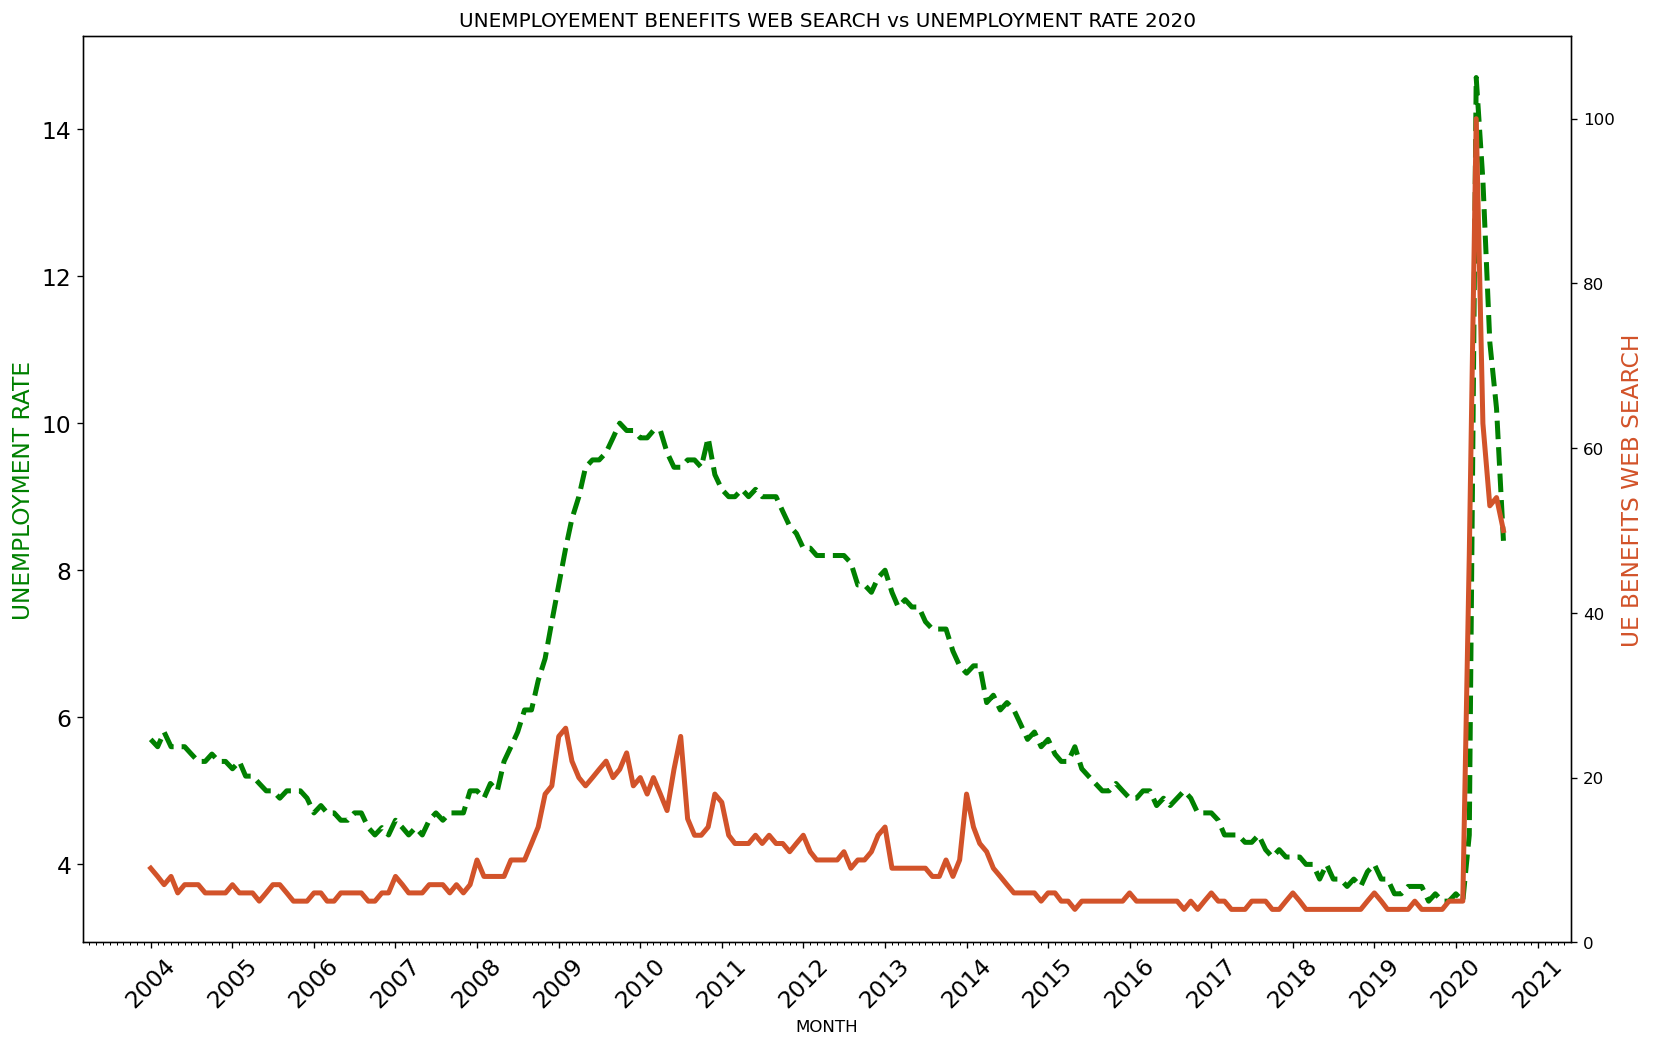

In [178]:
# creating a graph
plt.figure(figsize=(16,10), dpi=120) # increases the size and resolution. the dpi is the dots per inch
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.xlabel('MONTH')

plt.title('UNEMPLOYEMENT BENEFITS WEB SEARCH vs UNEMPLOYMENT RATE 2020')

ax1 = plt.gca()
ax2 = ax1.twinx()

# add the formatting to the x axis so as to have the tick marks.
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('UNEMPLOYMENT RATE', fontsize=14, color="g")
ax2.set_ylim(0, 110)
ax2.set_ylabel('UE BENEFITS WEB SEARCH', fontsize=14, color="#D2532A")



ax1.plot(df_2020['MONTH'], df_2020['UNRATE'], "g", linewidth=3, linestyle='dashed')
ax2.plot(df_2020['MONTH'], df_2020['UE_BENEFITS_WEB_SEARCH'], "#D2532A", linewidth=3)
# the line width increases the thickness of the graph lines



plt.show()